In [4]:
import joblib
import matplotlib.pyplot as plt
from math import ceil
import numpy as np

In [457]:
def show_logs():
    training_logs = joblib.load('./data/training_logs.pkl')
    #training_logs =  training_logs[1000:]
    print('len training_logs:', len(training_logs))
    
    ncols = 3
    n_graphs = len(training_logs[-1].keys())
    nrows = ceil(n_graphs / ncols)
    
    fig, axs = plt.subplots(nrows, ncols, figsize=(15, 15))
    for i, key in enumerate(training_logs[-1].keys()):
        axs[i // ncols, i % ncols].plot(
            #[tl[key] for tl in training_logs[205:]]
            [tl[key] for tl in training_logs]
        )
        axs[i // ncols, i % ncols].set_title(key)
        
        # Вычисляем скользящее среднее
        window_size = 10  # Размер окна скользящего среднего
        values = [tl[key] for tl in training_logs]
        moving_avg = np.convolve(values, np.ones(window_size) / window_size, mode='valid')
        
        # Строим скользящее среднее
        axs[i // ncols, i % ncols].plot(range(window_size-1, len(values)), moving_avg, color='red', label='Moving Average')
    
    # Увеличить вертикальный отступ между графиками
    plt.subplots_adjust(hspace=0.3)  # Значение hspace можно изменить для регулировки отступа
    
    # for ax in axs.flat:
    #   ax.set(xlabel='Training Step', ylabel='Value')
    
    # for ax in axs.flat:
    #   ax.label_outer()
    
    return training_logs

len training_logs: 1550


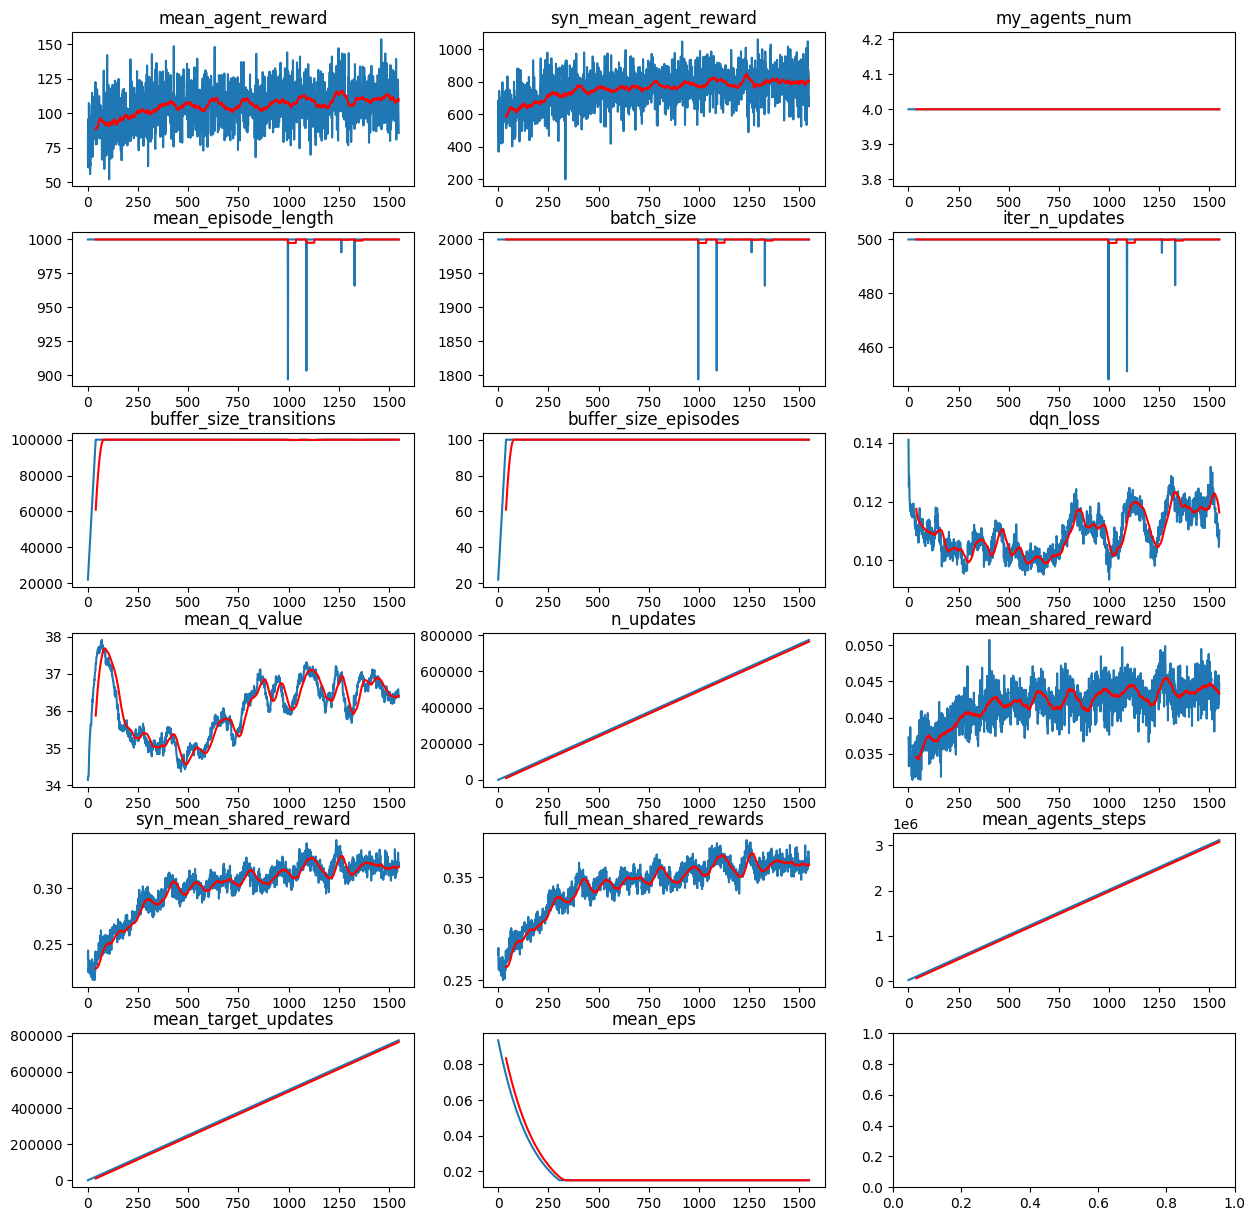

In [462]:
training_logs = show_logs()